In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from sklearn import preprocessing, cross_validation, svm

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import matplotlib.pyplot as plt

In [424]:
df = pd.read_csv('training.csv')

<h1>Checking for outliers</h1>

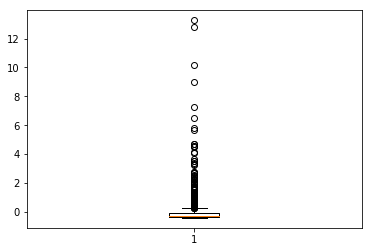

In [425]:
plt.boxplot(df['P'])
plt.show()

In [426]:
df['P'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0    -0.418309
0.1    -0.380266
0.2    -0.356057
0.3    -0.331848
0.4    -0.307638
0.5    -0.269595
0.6    -0.222560
0.7    -0.145090
0.8    -0.010210
0.9     0.353620
1.0    13.266841
Name: P, dtype: float64

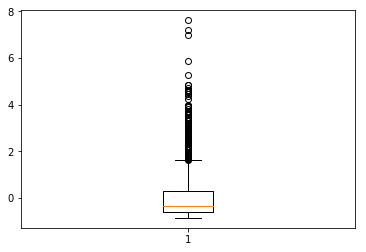

In [427]:
plt.boxplot(df['SOC'])
plt.show()

In [428]:
df['SOC'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -0.857863
0.1   -0.732844
0.2   -0.654708
0.3   -0.576571
0.4   -0.482806
0.5   -0.349974
0.6   -0.185886
0.7    0.087593
0.8    0.515783
0.9    1.567506
1.0    7.619989
Name: SOC, dtype: float64

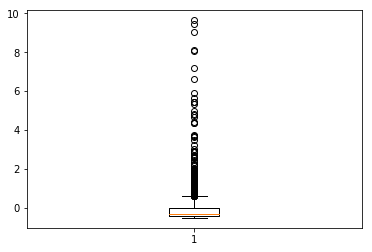

In [429]:
plt.boxplot(df['Ca'])
plt.show()

In [430]:
df['Ca'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -0.535828
0.1   -0.493713
0.2   -0.464093
0.3   -0.434358
0.4   -0.395714
0.5   -0.348682
0.6   -0.272262
0.7   -0.141752
0.8    0.053666
0.9    0.864264
1.0    9.645815
Name: Ca, dtype: float64

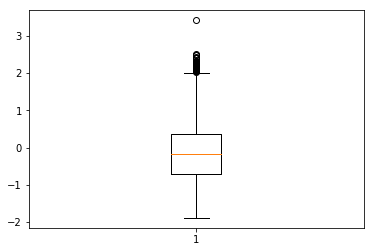

In [431]:
plt.boxplot(df['pH'])
plt.show()

In [432]:
df['pH'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -1.886946
0.1   -1.045190
0.2   -0.830075
0.3   -0.577548
0.4   -0.386750
0.5   -0.175376
0.6    0.021034
0.7    0.228667
0.8    0.589687
0.9    1.554901
1.0    3.416117
Name: pH, dtype: float64

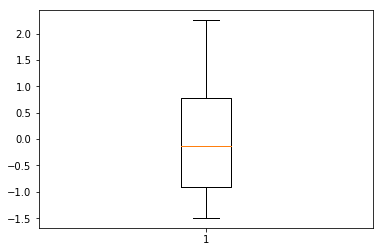

In [433]:
plt.boxplot(df['Sand'])
plt.show()

In [434]:
df['Sand'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -1.493378
0.1   -1.192707
0.2   -0.998604
0.3   -0.804500
0.4   -0.489366
0.5   -0.134651
0.6    0.160691
0.7    0.593048
0.8    0.995719
0.9    1.493538
1.0    2.251685
Name: Sand, dtype: float64

<h3>Outlier Removal</h3><br>
The possible outliers were found in pH , Ca , SOC , P from the boxplot.<br>
All the combinations were tried and the best result was produced when only otliers from P were removed . 

In [435]:
df = df[(df['P']<=1)  ]

In [436]:
len(df.columns)

3600

In [437]:
df['Depth'] = df['Depth'].replace(['Topsoil','Subsoil'] , [0,1])

In [438]:
df_1 = df.copy()

In [439]:
del df_1['PIDN']

In [440]:
del df_1['SOC']

In [441]:
del df_1['pH']

In [442]:
del df_1['Ca']

In [443]:
del df_1['Sand']

In [444]:
del df_1['P']

In [533]:
y = df['Sand']

In [534]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size=0.25, random_state=324)

<h3>Decision Tree Regressor</h3>

In [535]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [536]:
y_prediction = regressor.predict(X_test)
y_prediction[:2]

array([-0.98337972, -1.44770668])

In [537]:
y_test.describe()

count    275.000000
mean      -0.026451
std        0.988277
min       -1.493378
25%       -0.899649
50%       -0.149875
75%        0.767361
max        2.080417
Name: Sand, dtype: float64

In [538]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [539]:
print(RMSE)

0.5722881243192548


<h3>Support Vector Regressor</h3>

In [540]:
clf = svm.SVR(C=3000)
# C value is high as the number of features is very large 
# so overfitting can occur , to prevent that  , C value is kept very high

In [541]:
clf.fit(X_train, y_train)

SVR(C=3000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [542]:
y_pred = clf.predict(X_test)

In [543]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [544]:
RMSE

0.3109084747181372

In [545]:
df_out = pd.read_csv('sorted_test.csv')

In [546]:
df_out['Depth'] = df_out['Depth'].replace(['Topsoil','Subsoil'] , [0,1])

In [547]:
df_2 = df_out.copy()

In [548]:
del df_2['PIDN']

In [549]:
y_test = clf.predict(df_2)

In [550]:
res = pd.read_csv('sample_submission.csv')

In [551]:
res['Sand'] = y_test

In [552]:
res.to_csv('sample_submission.csv', index= False)

In [553]:
out = pd.read_csv('sample_submission.csv')

In [554]:
out.head()

,PIDN,Ca,P,pH,SOC,Sand
0,09gt9UK5,-0.647376,-0.078757,-1.116538,-0.583422,1.469265
1,0BVvxJ6a,0.479937,-0.244088,0.824477,-0.003242,-1.564817
2,0KbdgApg,-0.130924,-0.333210,-0.250260,0.022199,-0.636958
3,0MnuuduB,-0.282624,-0.184166,0.077521,0.706229,-0.816313
4,0PcIsF9z,-0.415158,-0.266055,-1.693722,0.083189,-0.184081
